## applying Q and sarsa on MountainCar  environment

> ### states:
2 continuous: position of the car and it's velocity

> ### actions:
Three possible actions: 0 means push left, 1 means do nothing (not sure why you’d ever do that), and 2 means push right.

> ### rewards:
They say you get “-1 for each time step until the goal position of 0.5 is reached”. So there’s no positive reward? Huh. They also say “there is no penalty for climbing the left hill, which upon reached acts as a wall”. I guess that means I can bounce my car off it.

> ### episode terminates at:
> 200 step for each episode

> if the position of the car is at 0.5

# 1- import libraries

In [4]:
import gym
import matplotlib.pyplot as plt
import numpy as np

# 2- choose the environment and reset it to the initial state

In [5]:
import gym
env = gym.make('MountainCar-v0')
env.reset()

array([-0.51846373,  0.        ], dtype=float32)

In [10]:
## let's look at the states of our environment
s=env.observation_space
s

Box([-1.2  -0.07], [0.6  0.07], (2,), float32)

#### Box: means we have continuous number of states represented by two numbers:
velocity of the car ranges -0.07 to 0.07
,,position of the car ranges -1.2 to 0.6 

# 3- time to discritize our states to be able to build our Q_table 
##### note: we don't do this with discrete states type of environments

In [11]:
num_states = (env.observation_space.high - env.observation_space.low)*\
                    np.array([10, 100])
num_states = np.round(num_states, 0).astype(int) + 1
    
print(num_states)


[19 15]


#### [19  15] means that we have 19 different position for the car, each has a velocity of the 15 we have

# 4- build the Q_table and initialize it with 0 

In [9]:
# Initialize Q table with 0
Q = np.zeros(shape = (num_states[0], num_states[1],  env.action_space.n))
Q

array([[[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

    

# 5- now we can make a policy that agent can follow will playing the game

choose_action(), what does it do?

it's about choosing whether you want your agent to explore the environment or exploit it (explanation for both is in a notebook in the same repository), so:

1- pick a random number

2- if this number is less than epsilon, this means that epsilon is a big number so we will tend to explore and make random action

3- if this number is larger than epsilon , this means that epsilon is a small number so we will tend to exploit and choose the action that the largest Q_value in the Q_table



In [13]:
def choose_action(env,epsilon, Q,state_adj):
     if np.random.random() < epsilon:
        return np.random.randint(0, env.action_space.n) 
     else:
        return np.argmax(Q[state_adj[0], state_adj[1]])
       
                
    

# 6- now time to implemetent the Qlearning algorithm

#### note :this algorithm can be implemented with much more simpler ways, all do the same thing, but the performance of the agent can differ from one to another.

In [21]:
def QLearning(env, learning, discount, epsilon, min_eps, episodes):
    #Q = np.random.uniform(low = -1, high = 1, size = (num_states[0], num_states[1], env.action_space.n))
    Q = np.zeros(shape = (num_states[0], num_states[1],  env.action_space.n))
    reduction = (epsilon - min_eps)/episodes
    reward_list = []
    ave_reward_list = []
    for i in range(episodes):
        # Initialize parameters
        done = False
        tot_reward, reward = 0,0
        state = env.reset()
        
        # Discretize state
        state_adj = (state - env.observation_space.low)*np.array([10, 100])
        state_adj = np.round(state_adj, 0).astype(int)
        
        while done != True:   
           
            # Determine next action - epsilon greedy strategy, you can call the function above
            if np.random.random() < epsilon:
                action = np.random.randint(0, env.action_space.n)
            else:
                action = np.argmax(Q[state_adj[0], state_adj[1]]) 
                
                
            # Get next state and reward
            state2, reward, done, info = env.step(action) 
            
            # Discretize state2
            state2_adj = (state2 - env.observation_space.low)*np.array([10, 100])
            state2_adj = np.round(state2_adj, 0).astype(int)
            
            #Allow for terminal states
            if done and state2[0] >= 0.5:
                Q[state_adj[0], state_adj[1], action] = reward
                
            # Adjust Q value for current state
            else:
                delta = learning*(reward + 
                                 discount*np.max(Q[state2_adj[0], state2_adj[1]]) -Q[state_adj[0], state_adj[1],action])
                Q[state_adj[0], state_adj[1],action] += delta
                                     
            # Update variables
            tot_reward += reward
            state_adj = state2_adj
        
        # Decay epsilon, as we want to tend to exploit while discovering 
        if epsilon > min_eps:
            epsilon -= reduction
        
        # Track rewards
        reward_list.append(tot_reward)
        #we want here to show the average of rewards over each 100 episode
        if (i+1) % 100 == 0:
            ave_reward = np.mean(reward_list)
            ave_reward_list.append(ave_reward)
            reward_list = []
            
        if (i+1) % 100 == 0:    
            print('Episode {} Average Reward: {}'.format(i+1, ave_reward))
            
    env.close()
    
    return ave_reward_list


    
    

Episode 100 Average Reward: -200.0
Episode 200 Average Reward: -200.0
Episode 300 Average Reward: -200.0
Episode 400 Average Reward: -200.0
Episode 500 Average Reward: -200.0
Episode 600 Average Reward: -200.0
Episode 700 Average Reward: -200.0
Episode 800 Average Reward: -200.0
Episode 900 Average Reward: -200.0
Episode 1000 Average Reward: -200.0
Episode 1100 Average Reward: -200.0
Episode 1200 Average Reward: -200.0
Episode 1300 Average Reward: -200.0
Episode 1400 Average Reward: -200.0
Episode 1500 Average Reward: -200.0
Episode 1600 Average Reward: -200.0
Episode 1700 Average Reward: -200.0
Episode 1800 Average Reward: -200.0
Episode 1900 Average Reward: -200.0
Episode 2000 Average Reward: -200.0
Episode 2100 Average Reward: -200.0
Episode 2200 Average Reward: -200.0
Episode 2300 Average Reward: -200.0
Episode 2400 Average Reward: -200.0
Episode 2500 Average Reward: -200.0
Episode 2600 Average Reward: -200.0
Episode 2700 Average Reward: -200.0
Episode 2800 Average Reward: -200.0
E

Text(0, 0.5, 'Average Reward')

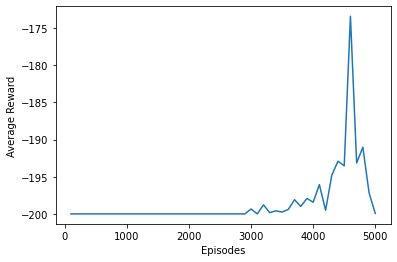

In [22]:
# test the performance of our agent
rewards = QLearning(env, 0.2, 0.9, 0.8, 0, 5000)

# Plot Rewards
plt.plot(100*(np.arange(len(rewards)) + 1), rewards)
plt.xlabel('Episodes')
plt.ylabel('Average Reward')
 

# 7- let's see what sarsa would do! 

#### note: same as Q but, the Q function differs, instead of choosing the max Q_value of the current state, we will take the Q_value of the next action of the next state.

In [23]:
def sarsa(env, learning, discount, epsilon, min_eps, episodes):
    #Q = np.random.uniform(low = -1, high = 1, size = (num_states[0], num_states[1], env.action_space.n))
    Q = np.zeros(shape = (num_states[0], num_states[1],  env.action_space.n))
    reduction = (epsilon - min_eps)/episodes
    reward_list = []
    ave_reward_list = []
    for i in range(episodes):
        # Initialize parameters
        done = False
        tot_reward, reward = 0,0
        state = env.reset()
        
        # Discretize state
        state_adj = (state - env.observation_space.low)*np.array([10, 100])
        state_adj = np.round(state_adj, 0).astype(int)
        action=choose_action(env,epsilon,Q,state_adj)
        while done != True:             
            # Get next state and reward
            state2, reward, done, info = env.step(action) 
            action2=choose_action(env,epsilon,Q,state_adj)
            # Discretize state2
            state2_adj = (state2 - env.observation_space.low)*np.array([10, 100])
            state2_adj = np.round(state2_adj, 0).astype(int)
            
            #Allow for terminal states, terminations is when position of the current state reaches 0.5
            if done and state2[0] >= 0.5:
                Q[state_adj[0], state_adj[1], action] = reward
                
            # Adjust Q value for current state
            else:
                delta = learning*(reward + discount* Q[state2_adj[0], state2_adj[1],action2]- Q[state_adj[0], state_adj[1],action])
                Q[state_adj[0], state_adj[1],action] += delta
                                     
            # Update variables
            tot_reward += reward
            state_adj = state2_adj
        
        # Decay epsilon
        if epsilon > min_eps:
            epsilon -= reduction
        
        # Track rewards
        reward_list.append(tot_reward)
        #we want here to show the average of rewards over each 100 episode
        if (i+1) % 100 == 0:
            ave_reward = np.mean(reward_list)
            ave_reward_list.append(ave_reward)
            reward_list = []
            
        if (i+1) % 100 == 0:    
            print('Episode {} Average Reward: {}'.format(i+1, ave_reward))
            
    env.close()
    
    return ave_reward_list


    
    

Episode 100 Average Reward: -200.0
Episode 200 Average Reward: -200.0
Episode 300 Average Reward: -200.0
Episode 400 Average Reward: -200.0
Episode 500 Average Reward: -200.0
Episode 600 Average Reward: -200.0
Episode 700 Average Reward: -200.0
Episode 800 Average Reward: -200.0
Episode 900 Average Reward: -200.0
Episode 1000 Average Reward: -200.0
Episode 1100 Average Reward: -200.0
Episode 1200 Average Reward: -200.0
Episode 1300 Average Reward: -200.0
Episode 1400 Average Reward: -200.0
Episode 1500 Average Reward: -200.0
Episode 1600 Average Reward: -200.0
Episode 1700 Average Reward: -200.0
Episode 1800 Average Reward: -200.0
Episode 1900 Average Reward: -200.0
Episode 2000 Average Reward: -200.0
Episode 2100 Average Reward: -200.0
Episode 2200 Average Reward: -200.0
Episode 2300 Average Reward: -200.0
Episode 2400 Average Reward: -200.0
Episode 2500 Average Reward: -200.0
Episode 2600 Average Reward: -200.0
Episode 2700 Average Reward: -200.0
Episode 2800 Average Reward: -200.0
E

Text(0, 0.5, 'Average Reward')

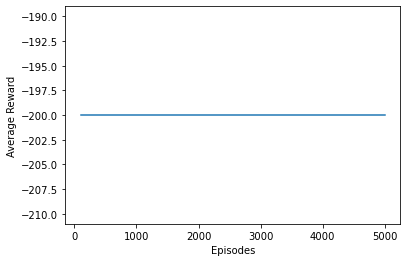

In [24]:
# test the performance
rewards = sarsa(env, 0.2, 0.9, 0.8, 0, 5000)

# Plot Rewards
plt.plot(100*(np.arange(len(rewards)) + 1), rewards)
plt.xlabel('Episodes')
plt.ylabel('Average Reward')
 

> ## as we can see here, the performance of the agent while Q_learning is better than sarsa (in this environment !)

> ## try different values for parameters and see the results

> ## this algorithm can be implemented in much more simpler way, but here seemed complicated because we have continuous range  type of states 
